# Prediction analyze

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import sys
import common_functions as cf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR

In [56]:
prediction_week = 30

In [57]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
dp = cf.DataPreprocesser(weather_path, demand_path, solar_path)
dp.load_df()
dp.remove_nan()
dp.interpolate_df()
dp.set_df(dp.df[dp.df['week']!=44])
dp.df.head()

/home/raph/project/westernpower/westernpower/task0/common_functions.py:39: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,0.0,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0


In [58]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
ml_predictor.predict_solar_power_from_weather(RandomForestRegressor(random_state=2019, n_estimators = 300))

/home/raph/project/westernpower/westernpower/task0/common_functions.py:256: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  demand_prediction['week']=demand_prediction.index.week


,demand_MW,week,dow,hour,sp,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,1.73,30.0,0.0,0.0,1.0,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,1.62,30.0,0.0,0.0,2.0,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,1.56,30.0,0.0,1.0,3.0,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,1.48,30.0,0.0,1.0,4.0,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,1.48,30.0,0.0,2.0,5.0,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30.0,6.0,21.0,44.0,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,2.15,30.0,6.0,22.0,45.0,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,1.93,30.0,6.0,22.0,46.0,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dp_task1 = cf.DataPreprocesser('../task1/Input/weather_train_set1.csv', '../task1/Input/demand_train_set1.csv', '../task1/Input/pv_train_set1.csv')
dp_task1.load_df()
dp_task1.remove_nan()
dp_task1.interpolate_df()
dp_task1.df.head()

/home/raph/project/westernpower/westernpower/task0/common_functions.py:39: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-03 00:00:00,2.19,0.0,0.0,7.05,7.46,13.20,9.640,6.680,13.090,8.560,0.0,0.0,0.0,0.0,0.0,0.0,44,4,0,1.0
2017-11-03 00:30:00,2.14,0.0,0.0,7.38,7.30,13.26,9.675,6.475,13.150,8.625,0.0,0.0,0.0,0.0,0.0,0.0,44,4,0,2.0
2017-11-03 01:00:00,2.01,0.0,0.0,7.70,7.14,13.32,9.710,6.270,13.210,8.690,0.0,0.0,0.0,0.0,0.0,0.0,44,4,1,3.0
2017-11-03 01:30:00,1.87,0.0,0.0,7.48,7.00,13.34,9.720,6.090,13.255,8.715,0.0,0.0,0.0,0.0,0.0,0.0,44,4,1,4.0
2017-11-03 02:00:00,1.86,0.0,0.0,7.20,6.86,13.36,9.730,5.910,13.300,8.740,0.0,0.0,0.0,0.0,0.0,0.0,44,4,2,5.0


No handles with labels found to put in legend.


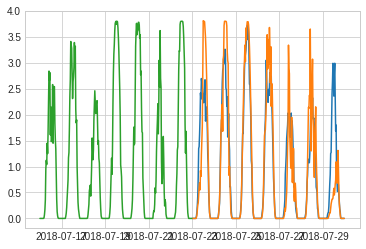

In [59]:
plt.plot(ml_predictor.predicted_df['pv_power_mw'])
plt.plot(dp_task1.df.loc[dp_task1.df['week'] == 30, ['pv_power_mw']])
plt.plot(dp.df.loc[dp.df['week'] == 29, ['pv_power_mw']])
plt.legend()
plt.show()

No handles with labels found to put in legend.


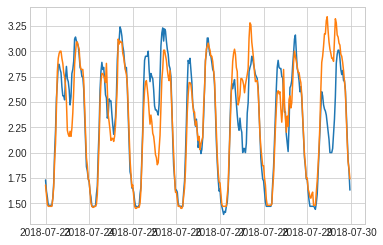

In [10]:
plt.plot(ml_predictor.predicted_df['demand_MW'])
plt.plot(dp_task1.df.loc[dp_task1.df['week'] == 30, ['demand_MW']])
plt.legend()
plt.show()

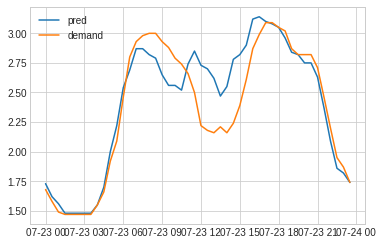

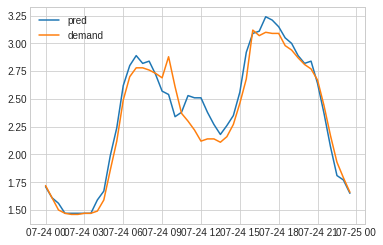

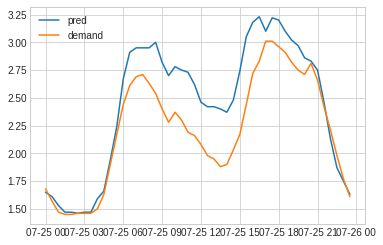

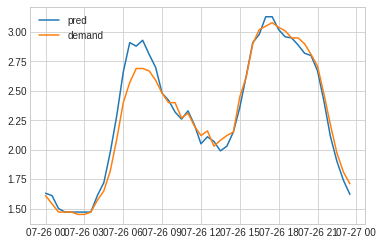

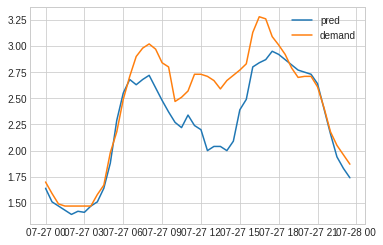

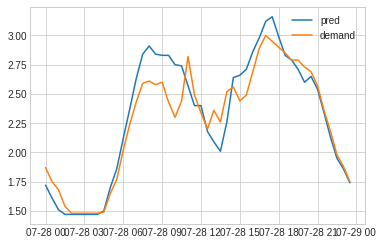

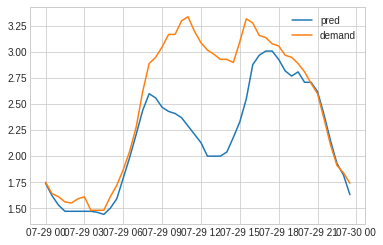

In [8]:
for i in range(7):
    plt.plot(ml_predictor.predicted_df.loc[ml_predictor.predicted_df['dow'] == i, ['demand_MW']], label='pred')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), ['demand_MW']], label = 'demand')
    plt.legend()
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 28) & (dp_task1.df['dow'] == i), ['demand_MW']].values)
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 31) & (dp_task1.df['dow'] == i), ['demand_MW']].values)
    plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
X = dp.df['demand_MW'].values[:1000]

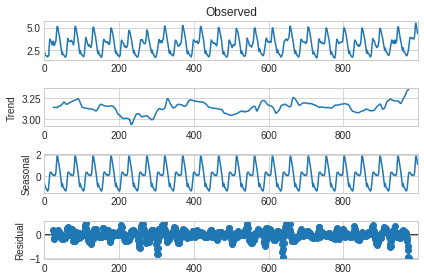

In [12]:
decomp_x = seasonal_decompose(X, model ='additive', period = 48)
decomp_x.plot()
plt.show()

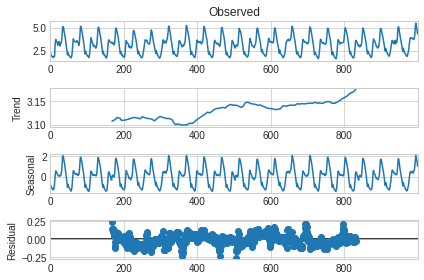

In [13]:
X = dp.df['demand_MW'].values[:1000]
decomp_x = seasonal_decompose(X, model ='additive', period = 48*7)
decomp_x.plot()
plt.show()

In [12]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [13]:
dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values

array([1.61, 1.51, 1.47, ..., 1.93, 1.82, 1.63])

In [14]:
model1 = SARIMAX(dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values, order=(1,1,1), seasonal_order=(1,1,1,48))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [(i+1)*48/2 for i in range(6)]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1680
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 48)   Log Likelihood                1860.307
Date:                            Sun, 21 Feb 2021   AIC                          -3710.614
Time:                                    14:47:28   BIC                          -3683.630
Sample:                                         0   HQIC                         -3700.604
                                           - 1680                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.116      0.707      0.480      -0.145       0.308
ma.L1          0.0840      0.118   

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [16]:
model2 = SARIMAX(dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values, order=(0,1,1), seasonal_order=(1,1,1,48))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [(i+1)*48/2 for i in range(6)]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1680
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 48)   Log Likelihood                1860.233
Date:                            Sun, 21 Feb 2021   AIC                          -3712.467
Time:                                    14:55:13   BIC                          -3690.879
Sample:                                         0   HQIC                         -3704.458
                                           - 1680                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1625      0.016      9.929      0.000       0.130       0.195
ar.S.L48       0.1708      0.023   

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [17]:
from scipy.stats import shapiro

shapiro(results2.resid)

ShapiroResult(statistic=0.8243248462677002, pvalue=1.8063339763486552e-39)

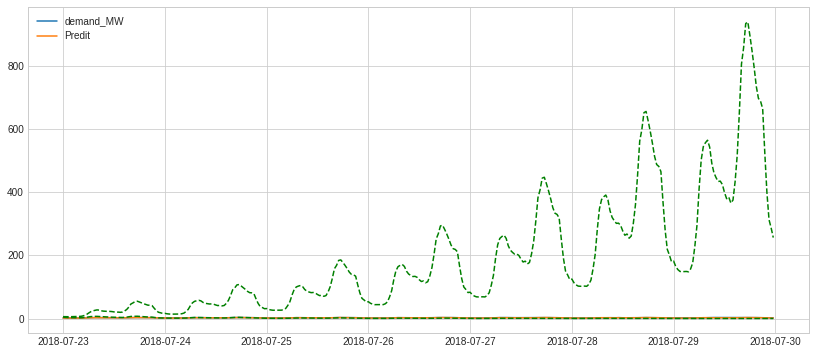

In [22]:
pred_model2 = results2.get_forecast(48*7)
pred = pd.DataFrame(pred_model2.predicted_mean, columns= ['mean'])
pred['pred_l'] = [elt[0]) for elt in pred_model2.conf_int(alpha=0.05)]
pred['pred_u'] = [np.exp(elt[1]) for elt in pred_model2.conf_int(alpha=0.05)]
pred.index = dp_task1.df[(dp_task1.df['week'] == 30)].index
# pred_l = [np.exp(elt[0]) for elt in pred_model2.conf_int(alpha=0.05)]
# pred_u = [np.exp(elt[1]) for elt in pred_model2.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(dp_task1.df[(dp_task1.df['week'] == 30)]['demand_MW'], label='demand_MW')
plt.plot(pred['mean'], label='Predit')
plt.plot(pred['pred_l'], color='g', linestyle='--')
plt.plot(pred['pred_u'], color='g', linestyle='--')
plt.legend()
plt.show()

100%|██████████| 5/5 [09:10<00:00, 110.19s/it]
{'best_model': RandomForestRegressor(), 'best_scores': 0.8238240098055296, 'best_parameters': {'n_estimators': 450}}
{'KNeighborsRegressor': {'best_model': KNeighborsRegressor(), 'best_scores': 0.8124589233548036, 'best_parameters': {'n_neighbors': 8}}, 'SVR': {'best_model': SVR(), 'best_scores': 0.8089517186935489, 'best_parameters': {'C': 1.0, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}}, 'GradientBoostingRegressor': {'best_model': GradientBoostingRegressor(), 'best_scores': 0.8153063588384979, 'best_parameters': {'learning_rate': 0.15, 'loss': 'ls', 'n_estimators': 200}}, 'Lasso, Ridge, ElasticNet': {'best_model': Ridge(), 'best_scores': 0.3117235645914465, 'best_parameters': {'alpha': 1.0}}, 'RandomForestRegressor': {'best_model': RandomForestRegressor(), 'best_scores': 0.8238240098055296, 'best_parameters': {'n_estimators': 450}}}
{'best_model': RandomForestRegressor(), 'best_scores': 0.8238240098055296, 'best_parameters': {'n_e

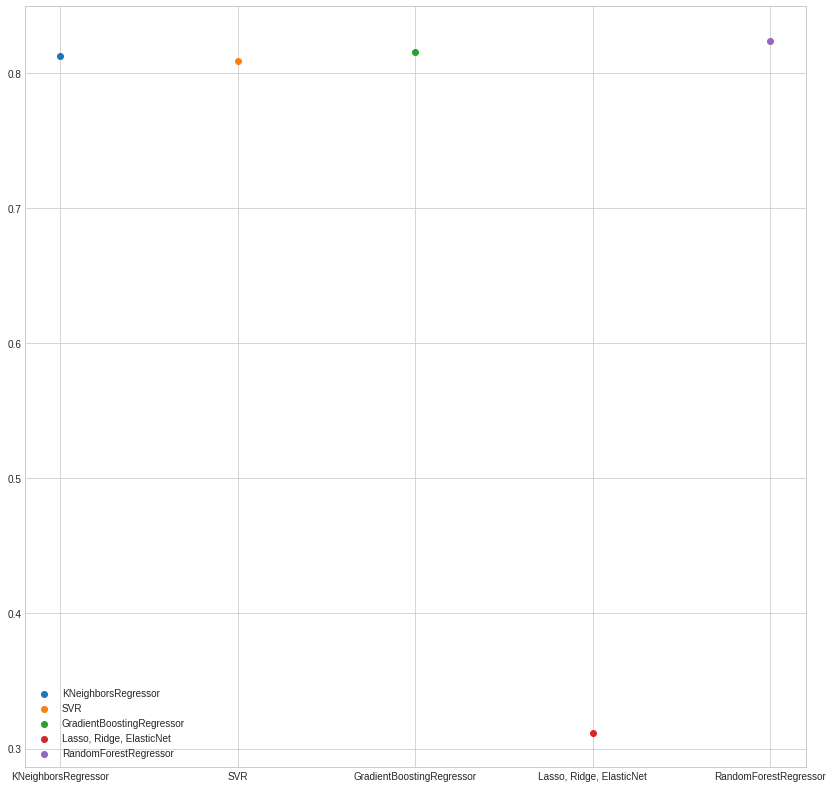

In [10]:
weather_columns = dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns.append('sp')
weather_columns.append('dow')
X,y = dp.build_input_for_ml_algo(weather_columns, ['demand_MW'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
ml_researcher = cf.MachineLearningResearcher(X_train,y_train)
with tqdm(total=len(ml_researcher.models), file=sys.stdout) as pbar:
    for model_name in ml_researcher.models:
        ml_researcher.get_best_scores_and_params_of_ml_algos(model_name)
        pbar.update()
print(ml_researcher.get_best_model_with_best_score())
print(ml_researcher.scores)
print(ml_researcher.get_best_model_with_best_score())
ml_researcher.display_ml_algo_scores()

In [15]:
weather_columns = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns.append('sp')
#weather_columns.append('dow')

In [16]:
X_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),weather_columns].values
y_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values

In [17]:
model = RandomForestRegressor(random_state=2019, n_estimators=450)
model.fit(X_train, y_train)
y_test = model.predict(ml_predictor.predicted_df[weather_columns].values)

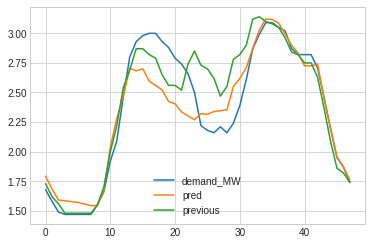

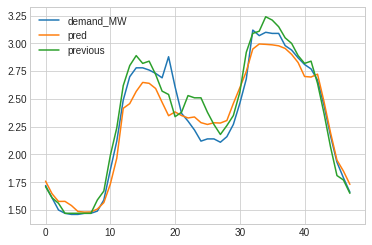

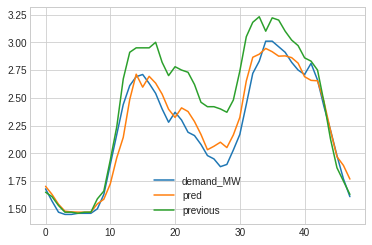

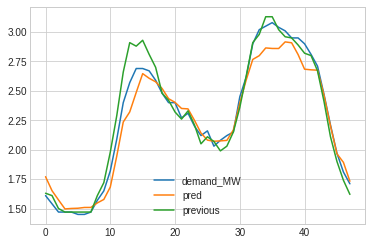

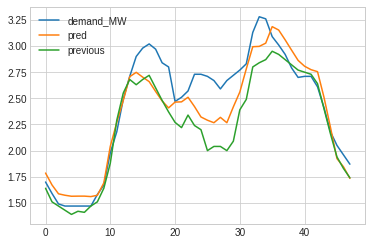

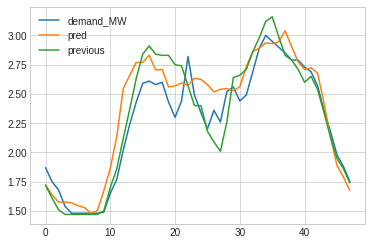

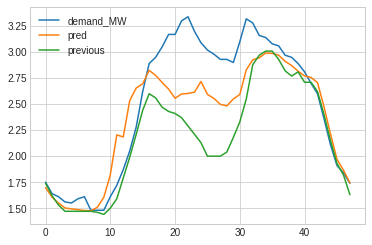

In [18]:
for i in range(7):
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'demand_MW'].values, label='demand_MW')
    plt.plot(y_test[i*48:(i+1)*48], label='pred')
    plt.plot(dp.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'demand_MW'].values, label='previous')
    plt.legend()
    plt.show()

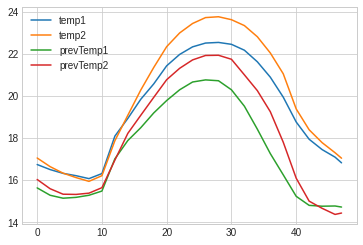

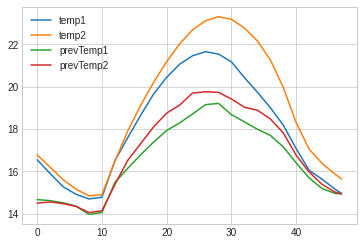

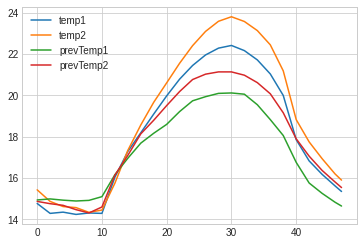

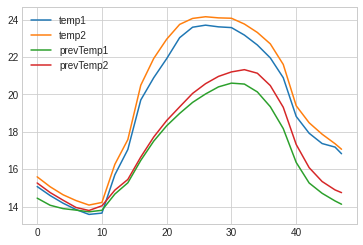

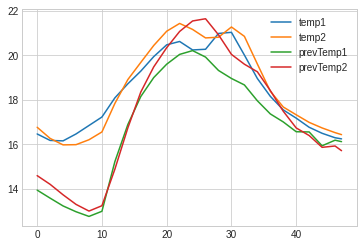

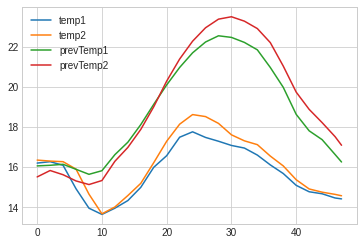

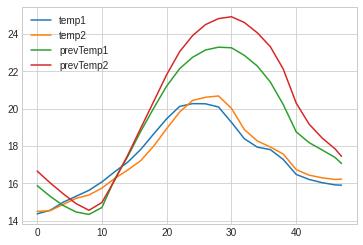

In [20]:
for i in range(7):
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location1'].values, label='temp1')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location2'].values, label='temp2')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location3'].values, label='temp3')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location4'].values, label='temp4')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location5'].values, label='temp5')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i), 'temp_location6'].values, label='temp6')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location1'].values, label='prevTemp1')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location2'].values, label='prevTemp2')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location3'].values, label='prevTemp3')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location4'].values, label='temp4')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location5'].values, label='prevTemp5')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 29) & (dp_task1.df['dow'] == i), 'temp_location6'].values, label='prevTemp6')
    plt.legend()
    plt.show()

In [50]:
def get_charge_dispatch2(solar_power, week, dow):
    solar_power = dp.df.loc[(dp.df['week']==week)&(dp.df['dow']==dow)&(dp.df['sp']<=31),['pv_power_mw','sp']]
    solar_power['ind'] = solar_power['sp'].apply(lambda x: int(x))
    max_power = 2.5
    uncertainty = 0.8
    ratio = solar_power['pv_power_mw'].apply(lambda x: min(x,max_power)).sum()*0.5
    if ratio > 1.5:
        coeff = uncertainty
    elif ratio > 1.2:
        coeff = 0.9
    else:
        coeff = 1
    solar_power = solar_power.sort_values('pv_power_mw', ascending=False)
    max_charge = 6
    max_solar_charge = min(max_charge,solar_power['pv_power_mw'].apply(lambda x: min(x,2,5)).sum()*0.5)
    max_grid_charge = max_charge - max_solar_charge
    solar_charge = 0
    grid_charge = 0
    battery_B = pd.DataFrame(columns = ['ind', 'sp', 'solar_B', 'grid_B'])
    for i in range (len(solar_power)):
        solar_B = min(min(coeff*solar_power['pv_power_mw'][i], max_power), max(0,max_solar_charge - solar_charge)*2)
        grid_B = min(max_power-solar_B, max(0,(max_grid_charge-grid_charge)*2))
        battery_B.loc[i, :] = [solar_power['ind'][i], solar_power['sp'][i], solar_B, grid_B]
        solar_charge += solar_B*0.5
        grid_charge += grid_B*0.5
    battery_B['B'] = battery_B['solar_B'] + battery_B['grid_B']
    battery_B =battery_B.sort_values('ind', ascending = True)
    battery_B.index = dp.df.loc[(dp.df['week']==week)&(dp.df['dow']==dow)&(dp.df['sp']<=31),:].index
    return battery_B.drop('ind', axis=1)

In [54]:
get_charge_dispatch2(solar_power, 29, 5)

,sp,solar_B,grid_B,B
datetime,,,,
2018-07-21 00:00:00,1.0,0.0,0,0.0
2018-07-21 00:30:00,2.0,0.0,0,0.0
2018-07-21 01:00:00,3.0,0.0,0,0.0
2018-07-21 01:30:00,4.0,0.0,0,0.0
2018-07-21 02:00:00,5.0,0.0,0,0.0
2018-07-21 02:30:00,6.0,0.0,0,0.0
2018-07-21 03:00:00,7.0,0.0,0,0.0
2018-07-21 03:30:00,8.0,0.0,0,0.0
2018-07-21 04:00:00,9.0,0.0,0,0.0


In [39]:

        
print(ratio)
print(coeff)
solar_power = solar_power.sort_values('pv_power_mw', ascending=False)

16.6
0.8


In [49]:
max_charge = 6
max_solar_charge = min(max_charge,solar_power['pv_power_mw'].apply(lambda x: min(x,2,5)).sum()*0.5)
max_grid_charge = max_charge - max_solar_charge
solar_charge = 0
grid_charge = 0
battery_B = pd.DataFrame(columns = ['ind', 'sp', 'solar_B', 'grid_B'])
for i in range (len(solar_power)):
    solar_B = min(min(coeff*solar_power['pv_power_mw'][i], max_power), max(0,max_solar_charge - solar_charge)*2)
    grid_B = min(max_power-solar_B, max(0,(max_grid_charge-grid_charge)*2))
    battery_B.loc[i, :] = [solar_power['ind'][i], solar_power['sp'][i], solar_B, grid_B]
    solar_charge += solar_B*0.5
    grid_charge += grid_B*0.5
battery_B['B'] = battery_B['solar_B'] + battery_B['grid_B']
battery_B =battery_B.sort_values('ind', ascending = True)
battery_B.index = dp.df.loc[(dp.df['week']==10)&(dp.df['dow']==1)&(dp.df['sp']<=31),:].index
battery_B.drop('ind', axis=1)

,sp,solar_B,grid_B,B
datetime,,,,
2018-03-06 00:00:00,1.0,0.0,0,0.0
2018-03-06 00:30:00,2.0,0.0,0,0.0
2018-03-06 01:00:00,3.0,0.0,0,0.0
2018-03-06 01:30:00,4.0,0.0,0,0.0
2018-03-06 02:00:00,5.0,0.0,0,0.0
2018-03-06 02:30:00,6.0,0.0,0,0.0
2018-03-06 03:00:00,7.0,0.0,0,0.0
2018-03-06 03:30:00,8.0,0.0,0,0.0
2018-03-06 04:00:00,9.0,0.0,0,0.0


In [37]:
6*1.2*0.9

6.4799999999999995

In [38]:
solar_power['pv_power_mw'][0]

3.39

In [47]:
battery_B

,ind,sp,solar_B,grid_B,B
datetime,,,,,
2018-03-06 00:00:00,1,1.0,0.0,0,0.0
2018-03-06 00:30:00,2,2.0,0.0,0,0.0
2018-03-06 01:00:00,3,3.0,0.0,0,0.0
2018-03-06 01:30:00,4,4.0,0.0,0,0.0
2018-03-06 02:00:00,5,5.0,0.0,0,0.0
2018-03-06 02:30:00,6,6.0,0.0,0,0.0
2018-03-06 03:00:00,7,7.0,0.0,0,0.0
2018-03-06 03:30:00,8,8.0,0.0,0,0.0
2018-03-06 04:00:00,9,9.0,0.0,0,0.0


In [73]:
dp.df.columns

Index(['demand_MW', 'irradiance_Wm-2', 'pv_power_mw', 'panel_temp_C',
       'temp_location3', 'temp_location6', 'temp_location2', 'temp_location4',
       'temp_location5', 'temp_location1', 'solar_location3',
       'solar_location6', 'solar_location2', 'solar_location4',
       'solar_location5', 'solar_location1', 'week', 'dow', 'hour', 'sp'],
      dtype='object')

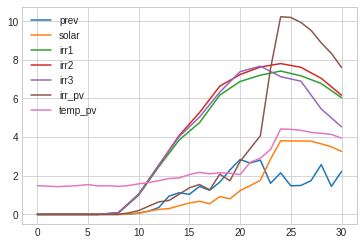

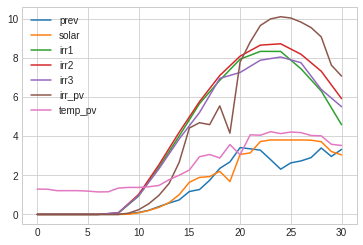

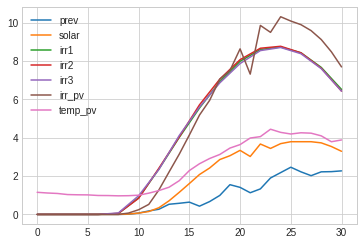

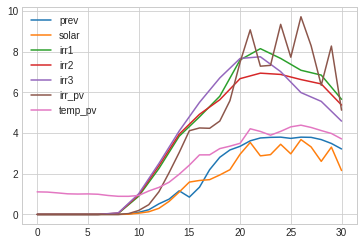

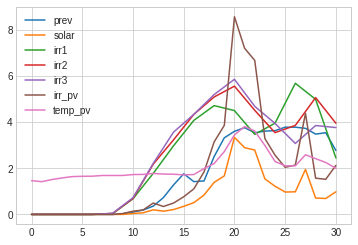

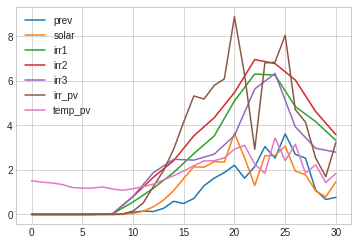

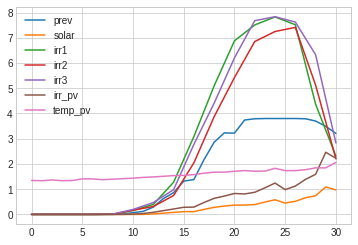

In [77]:
for i in range(7):
    plt.plot(dp.df.loc[(dp.df['week'] == 29) & (dp.df['dow'] == i)& (dp.df['sp'] <= 31) , 'pv_power_mw'].values, label='prev')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'pv_power_mw'].values, 
             label='solar')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location1'].values /100, 
             label='irr1')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location2'].values/100, 
             label='irr2')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location1'].values /5, 
#              label='temp1')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location2'].values/5, 
#              label='temp2')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location3'].values/100, 
             label='irr3')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'irradiance_Wm-2'].values/100, 
             label='irr_pv')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'panel_temp_C'].values/10, 
             label='temp_pv')
    plt.legend()
    plt.show()


In [69]:
dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == 6)& (dp_task1.df['sp'] <= 31), 'pv_power_mw'].sum()*0.5

3.9050000000000002

In [70]:
3.905/6

0.6508333333333333

In [71]:
(3*0.6508 +(1-0.6508))*30.96

71.257536

92.88

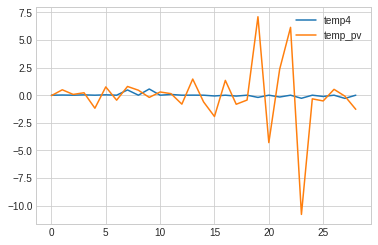

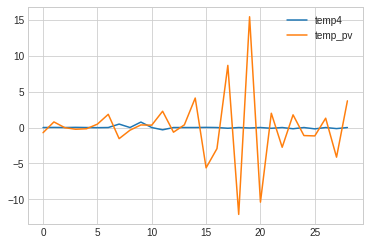

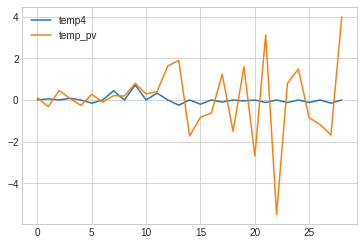

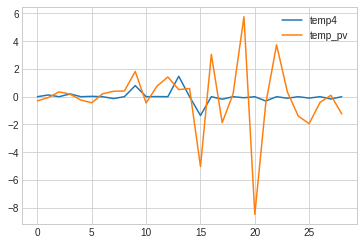

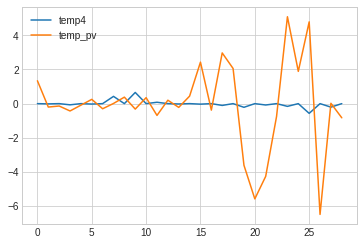

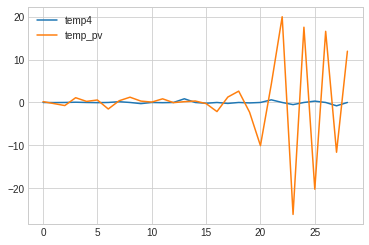

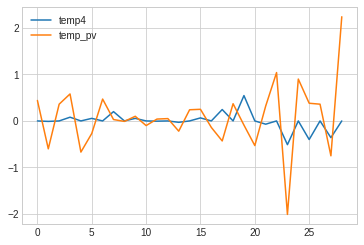

In [85]:
for i in range(7):
#     plt.plot(dp.df.loc[(dp.df['week'] == 29) & (dp.df['dow'] == i)& (dp.df['sp'] <= 31) , 'pv_power_mw'].values, label='prev')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'pv_power_mw'].values, 
#              label='solar')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location1'].values /100, 
#              label='irr1')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location2'].values/100, 
#              label='irr2')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location1'].values, 
#              label='temp1')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location2'].values, 
#              label='temp2')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location3'].values, 
#              label='temp3')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location4'].values, 
             label='temp4')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location5'].values, 
#              label='temp5')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'temp_location6'].values, 
#              label='temp6')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location3'].values/100, 
#              label='irr3')
#     plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'irradiance_Wm-2'].values/100, 
#              label='irr_pv')
    plt.plot(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'panel_temp_C'].values, 
             label='temp_pv')
    plt.legend()
    plt.show()

In [89]:
for i in range(7):
    print(i)
    print('solar1',dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), :].sum())
#     print(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location2'].sum())
#     print(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'solar_location4'].sum())
#     print(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'irradiance_Wm-2'].sum())
#     print(dp_task1.df.loc[(dp_task1.df['week'] == 30) & (dp_task1.df['dow'] == i)& (dp_task1.df['sp'] <= 31), 'pv_power_mw'].sum()*0.5)
    print('---------------------------------')
    

0
solar1 demand_MW             68.550
irradiance_Wm-2     9358.210
pv_power_mw           37.770
panel_temp_C         748.680
temp_location3       590.325
temp_location6       577.485
temp_location2       613.145
temp_location4       664.045
temp_location5       592.435
temp_location1       598.025
solar_location3    11406.435
solar_location6    12531.810
solar_location2    12325.345
solar_location4    12247.775
solar_location5    12073.360
solar_location1    11657.840
week                 930.000
dow                    0.000
hour                 225.000
sp                   496.000
dtype: float64
---------------------------------
1
solar1 demand_MW             65.930
irradiance_Wm-2    12884.060
pv_power_mw           50.470
panel_temp_C         782.020
temp_location3       559.325
temp_location6       571.835
temp_location2       585.420
temp_location4       624.065
temp_location5       577.815
temp_location1       564.900
solar_location3    12153.020
solar_location6    13351.650
solar

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
weather_columns = dp.get_columns_of_group_names(['solar'], range(1,7))
weather_columns.append('sp')
X_train = dp.df.loc[(dp.df['week'] <= 29) & (dp.df['pv_power_mw'] > 0.1), weather_columns].values
y_train = dp.df.loc[(dp.df['week'] <= 29) & (dp.df['pv_power_mw'] > 0.1), 'pv_power_mw'].values
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.95835769]
[39957.85445845]


In [117]:
X_pca = pca.fit_transform(X_train)

100%|██████████| 5/5 [02:30<00:00, 30.14s/it]
{'best_model': Lasso(), 'best_scores': 0.5436568367231103, 'best_parameters': {'alpha': 1.0}}
{'SVR': {'best_model': SVR(), 'best_scores': 0.5133926182901172, 'best_parameters': {'C': 0.2, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}}, 'KNeighborsRegressor': {'best_model': KNeighborsRegressor(), 'best_scores': 0.5283546922014846, 'best_parameters': {'n_neighbors': 99}}, 'GradientBoostingRegressor': {'best_model': GradientBoostingRegressor(), 'best_scores': 0.5322259796001086, 'best_parameters': {'learning_rate': 0.025, 'loss': 'ls', 'n_estimators': 100}}, 'Lasso, Ridge, ElasticNet': {'best_model': Lasso(), 'best_scores': 0.5436568367231103, 'best_parameters': {'alpha': 1.0}}, 'RandomForestRegressor': {'best_model': RandomForestRegressor(), 'best_scores': 0.3265244418517001, 'best_parameters': {'n_estimators': 200}}}
{'best_model': Lasso(), 'best_scores': 0.5436568367231103, 'best_parameters': {'alpha': 1.0}}


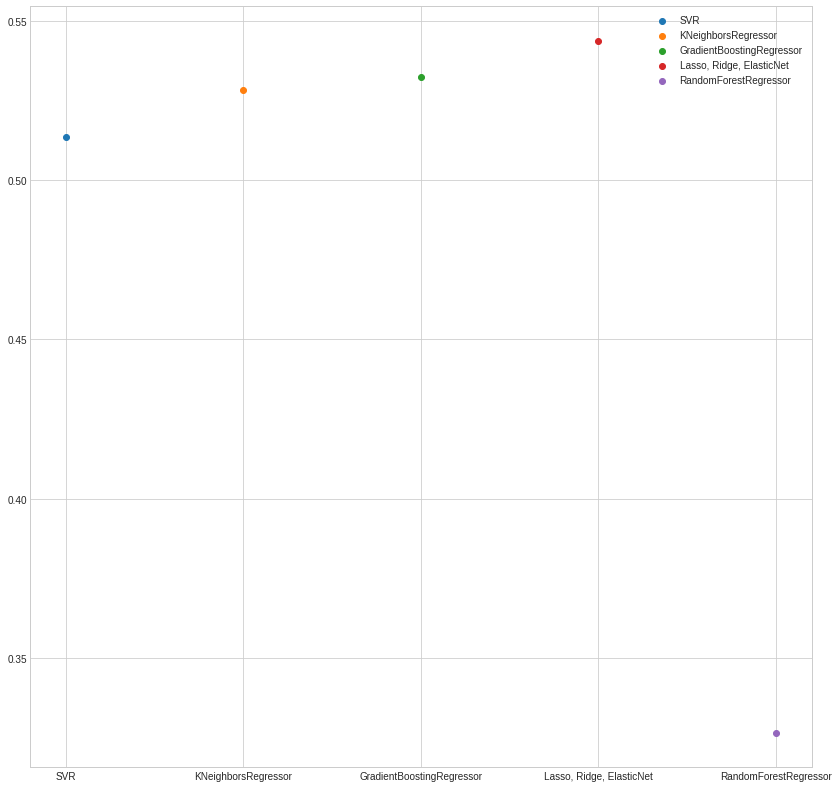

In [118]:
ml_res = cf.MachineLearningResearcher(X_pca, y_train)
with tqdm(total=len(ml_res.models), file=sys.stdout) as pbar:
    for model_name in ml_res.models:
        ml_res.get_best_scores_and_params_of_ml_algos(model_name)
        pbar.update()
print(ml_res.get_best_model_with_best_score())
print(ml_res.scores)
print(ml_res.get_best_model_with_best_score())
ml_res.display_ml_algo_scores()

In [120]:
print(dp.df.tail())

                     demand_MW  irradiance_Wm-2  pv_power_mw  panel_temp_C  \
datetime                                                                     
2018-07-22 21:30:00       2.40              0.0          0.0         15.93   
2018-07-22 22:00:00       2.15              0.0          0.0         15.49   
2018-07-22 22:30:00       1.93              0.0          0.0         15.19   
2018-07-22 23:00:00       1.82              0.0          0.0         15.06   
2018-07-22 23:30:00       1.63              0.0          0.0         15.03   

                     temp_location3  temp_location6  temp_location2  \
datetime                                                              
2018-07-22 21:30:00           17.20          19.295           18.80   
2018-07-22 22:00:00           17.01          19.140           18.43   
2018-07-22 22:30:00           16.60          18.980           18.14   
2018-07-22 23:00:00           16.19          18.820           17.85   
2018-07-22 23:30:00        